Notebook to merge ATL, CPR and AC products

In [1]:
from pystac_client import Client
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd 
import requests
from IPython.display import Image, display
import os 
import pathlib
from tqdm import tqdm

from scipy import stats  # will use scipy.stats.mode as the reducer
import matplotlib.colors as mcolors
from matplotlib.patches import Patch


In [2]:
_test = '_TEST10'

In [3]:
a = xr.open_dataset(f"AC__TC__2B_1s{_test}.nc", )
a

sh: 1: getfattr: not found


<xarray.Dataset> Size: 637kB
Dimensions:    (time: 7235)
Coordinates:
  * time       (time) datetime64[ns] 58kB 2025-06-12T06:53:45 ... 2025-06-14T...
Data variables:
    latitude   (time) float64 58kB ...
    longitude  (time) float64 58kB ...
    stc_2500   (time) float64 58kB ...
    stc_5000   (time) float64 58kB ...
    stc_7500   (time) float64 58kB ...
    stc_10000  (time) float64 58kB ...
    stc_12500  (time) float64 58kB ...
    stc_15000  (time) float64 58kB ...
    stc_17500  (time) float64 58kB ...
    stc_20000  (time) float64 58kB ...

In [6]:
b = xr.open_dataset(f"CPR_CLD_2A_1s{_test}.nc", )
b

sh: 1: getfattr: not found


<xarray.Dataset> Size: 254kB
Dimensions:            (time: 6342)
Coordinates:
  * time               (time) datetime64[ns] 51kB 2025-03-11T03:57:14 ... 202...
Data variables:
    latitude           (time) float64 51kB ...
    longitude          (time) float64 51kB ...
    land_flag          (time) float64 51kB ...
    ice_water_path     (time) float32 25kB ...
    liquid_water_path  (time) float32 25kB ...

In [11]:
a.merge(b, compat='override')

/tmp/ipykernel_2905/3936462188.py:1: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  a.merge(b, compat='override')


<xarray.Dataset> Size: 1MB
Dimensions:            (time: 13577)
Coordinates:
  * time               (time) datetime64[ns] 109kB 2025-03-11T03:57:14 ... 20...
Data variables: (12/13)
    latitude           (time) float64 109kB nan nan nan ... -23.23 -23.3 -23.35
    longitude          (time) float64 109kB nan nan nan ... 148.8 148.8 148.8
    stc_2500           (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    stc_5000           (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    stc_7500           (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    stc_10000          (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    ...                 ...
    stc_15000          (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    stc_17500          (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    stc_20000          (time) float64 109kB nan nan nan nan ... -1.0 -1.0 -1.0
    land_flag          (time) float64 109kB 0.0 0.0 0.0 0.0 ... nan nan nan nan
    ice_water_path     (time) float32 54kB nan nan nan nan ... nan nan nan nan
    liquid_water_path  (time) float32 54kB nan nan nan nan ... nan nan nan nan

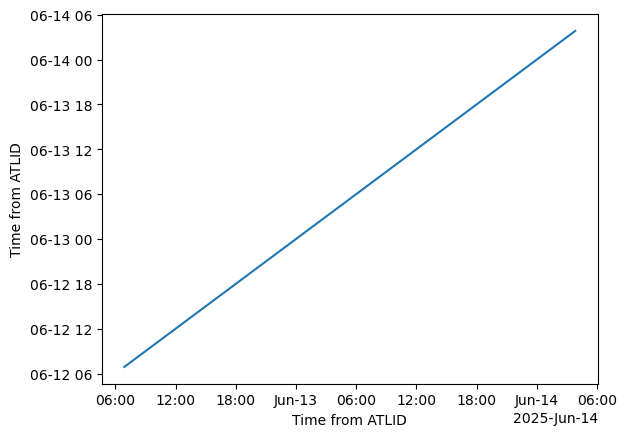

In [12]:
a.time.plot()